<a href="https://colab.research.google.com/github/dangeunii/AI_code/blob/main/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

확률적 경사 하강법

In [ ]:
## 데이터 준비하기
import pandas as pd

fish = pd.read_csv('Fish_csv_data.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
## input 데이터 세트를 numpy로 변환, 타겟데이터 추출
fish_input = fish[['Weight','Length','Diagonal','Height','Width']]
fish_target = fish['Species'].to_numpy()

print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [ ]:
## 훈련데이터와 테스트세트로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

In [ ]:
## 훈련 및 테스트 데이터세트를 표준점수로 변환
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
## 확룰적경사하강법을 제공하는 대표적인 분류용 클래스인 SGDClassifier
## SGDClassifier의 loss(손실함수)-log(이진분류), max_iter(에포크)이용
## warning 발생, 훈련횟수 부족으로 인한 경고, score도 높지 않음
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log',max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
## SGD로 한 에포크씩 수행
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8319327731092437
0.85


에포크와 과대 / 과소적합

In [ ]:
## 최적의 에프크횟수를 확인
import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
## partial_fit() 300번 수행
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes = classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
  print(train_score)

[0.5294117647058824]
[0.5294117647058824, 0.6218487394957983]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899, 0.8151260504201681]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.72268907

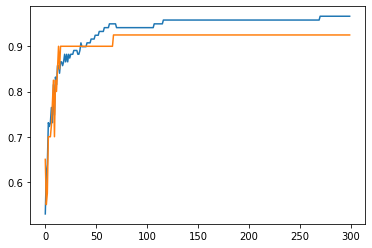

In [ ]:
## 횟수 별로 score 값 출력
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [ ]:
## 에포크횟수가 100인 지점이 최적이라서 SGDClassifier() 모델 생성 및 훈련 수행
## 높은 score 값 출력
sc = SGDClassifier(loss = 'log', max_iter = 100, tol=None, random_state =42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
## Loss 함수를 hinge로 사용한 분류기 생성
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol=None, random_state =42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
